In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_a.csv')

In [4]:
test.isnull().sum()#测试集pv、uv缺失值个数为2个

ID                    0
area                  0
rentType              0
houseType             0
houseFloor            0
totalFloor            0
houseToward           0
houseDecoration       0
communityName         0
city                  0
region                0
plate                 0
buildYear             0
saleSecHouseNum       0
subwayStationNum      0
busStationNum         0
interSchoolNum        0
schoolNum             0
privateSchoolNum      0
hospitalNum           0
drugStoreNum          0
gymNum                0
bankNum               0
shopNum               0
parkNum               0
mallNum               0
superMarketNum        0
totalTradeMoney       0
totalTradeArea        0
tradeMeanPrice        0
tradeSecNum           0
totalNewTradeMoney    0
totalNewTradeArea     0
tradeNewMeanPrice     0
tradeNewNum           0
remainNewNum          0
supplyNewNum          0
supplyLandNum         0
supplyLandArea        0
tradeLandNum          0
tradeLandArea         0
landTotalPrice  

In [5]:
train.isnull().sum()#pv、uv两项缺失值个数为18个

ID                     0
area                   0
rentType               0
houseType              0
houseFloor             0
totalFloor             0
houseToward            0
houseDecoration        0
communityName          0
city                   0
region                 0
plate                  0
buildYear              0
saleSecHouseNum        0
subwayStationNum       0
busStationNum          0
interSchoolNum         0
schoolNum              0
privateSchoolNum       0
hospitalNum            0
drugStoreNum           0
gymNum                 0
bankNum                0
shopNum                0
parkNum                0
mallNum                0
superMarketNum         0
totalTradeMoney        0
totalTradeArea         0
tradeMeanPrice         0
tradeSecNum            0
totalNewTradeMoney     0
totalNewTradeArea      0
tradeNewMeanPrice      0
tradeNewNum            0
remainNewNum           0
supplyNewNum           0
supplyLandNum          0
supplyLandArea         0
tradeLandNum           0


In [6]:
# 分析筛选目标变量阈值大小
num = len(train)

for i in range(1, 10):
    s = i*10000
    print('{:<6}: {:.5f}'.format(s, len(train[train['tradeMoney'] < s]) / num))

10000 : 0.93316
20000 : 0.98625
30000 : 0.99534
40000 : 0.99771
50000 : 0.99831
60000 : 0.99889
70000 : 0.99908
80000 : 0.99930
90000 : 0.99944


In [7]:
train = train[train['tradeMoney'] < 100000]

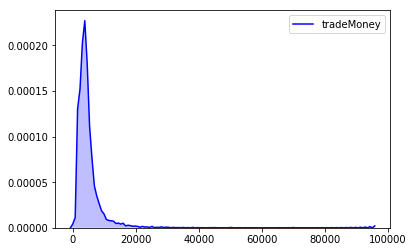

In [8]:
sns.kdeplot(train['tradeMoney'],  color="Blue", shade= True)

In [9]:
# 查看偏度和峰度
print("Skewness: %f" % train['tradeMoney'].skew())
print("Kurtosis: %f" % train['tradeMoney'].kurt())

Skewness: 6.169000
Kurtosis: 71.540481


In [10]:
#特征存储类型为object类型
f1 = train.dtypes[train.dtypes=='object'].index
f1

Index(['rentType', 'houseType', 'houseFloor', 'houseToward', 'houseDecoration',
       'communityName', 'city', 'region', 'plate', 'buildYear', 'tradeTime'],
      dtype='object')

In [11]:
#特征存储类型为不为object类型
f2 = train.dtypes[train.dtypes!='object'].index
f2

Index(['ID', 'area', 'totalFloor', 'saleSecHouseNum', 'subwayStationNum',
       'busStationNum', 'interSchoolNum', 'schoolNum', 'privateSchoolNum',
       'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum',
       'parkNum', 'mallNum', 'superMarketNum', 'totalTradeMoney',
       'totalTradeArea', 'tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney',
       'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum',
       'supplyNewNum', 'supplyLandNum', 'supplyLandArea', 'tradeLandNum',
       'tradeLandArea', 'landTotalPrice', 'landMeanPrice', 'totalWorkers',
       'newWorkers', 'residentPopulation', 'pv', 'uv', 'lookNum',
       'tradeMoney'],
      dtype='object')

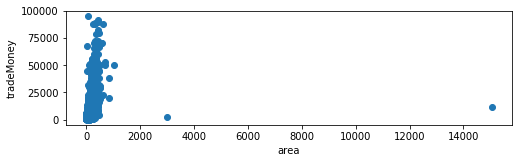

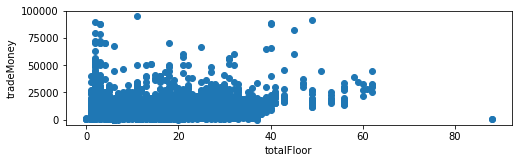

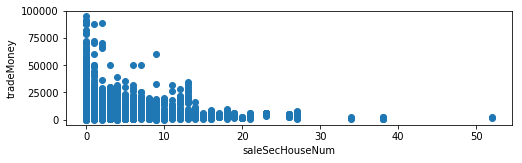

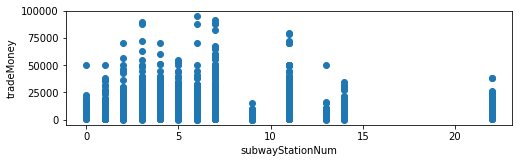

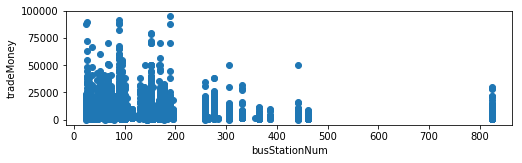

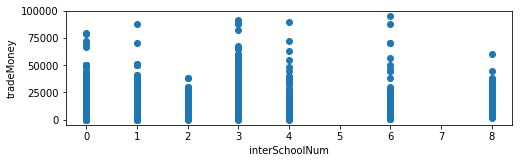

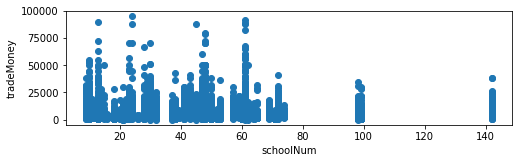

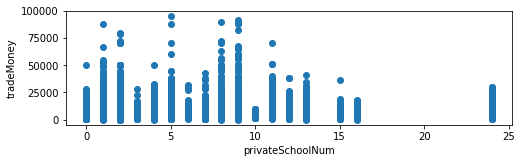

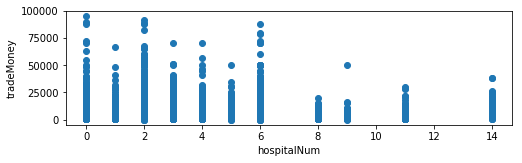

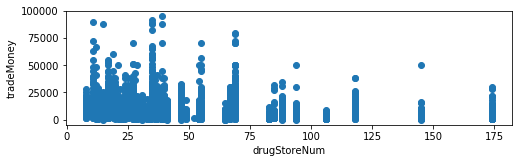

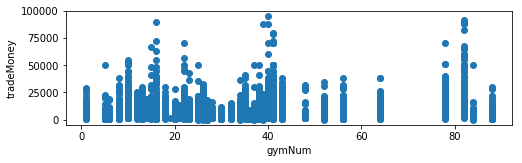

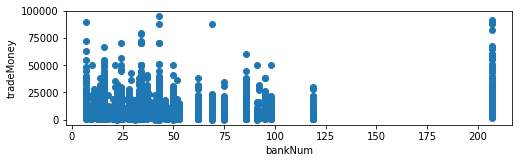

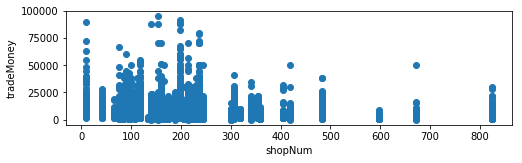

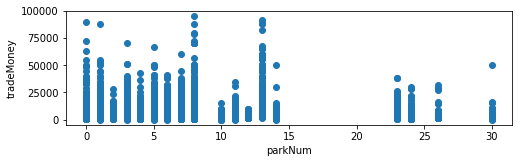

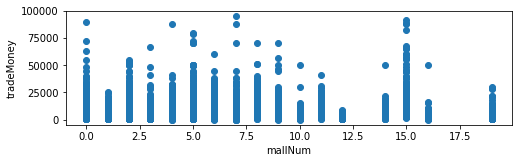

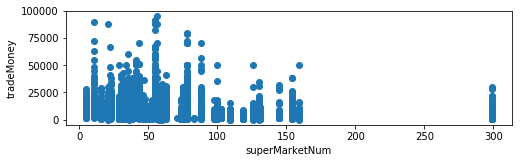

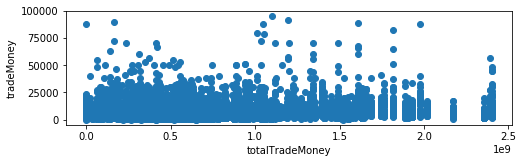

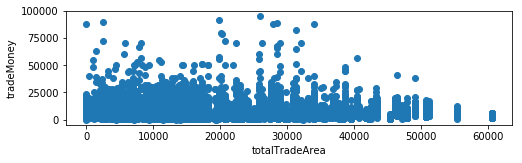

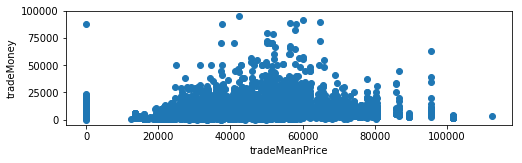

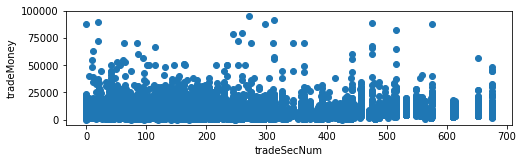

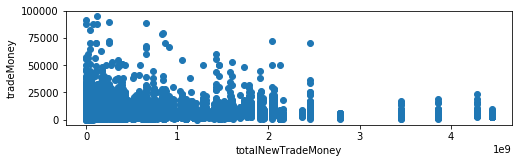

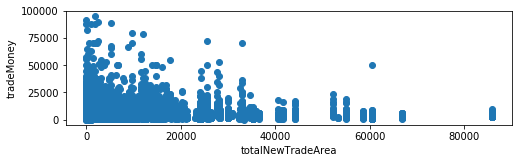

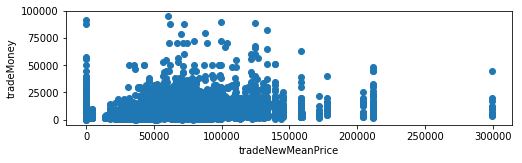

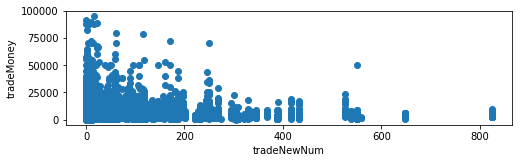

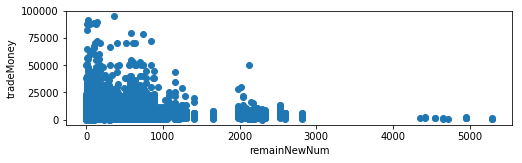

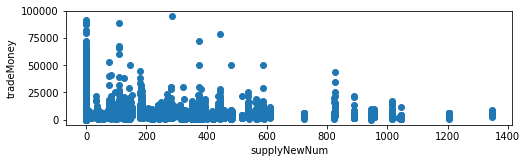

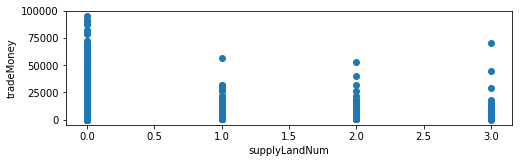

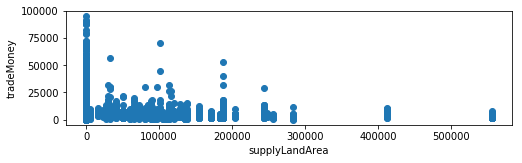

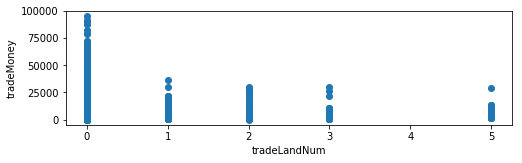

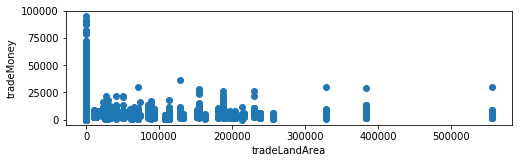

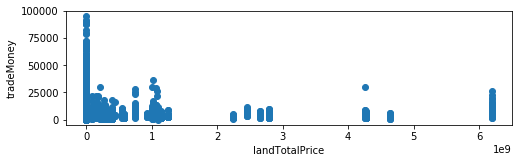

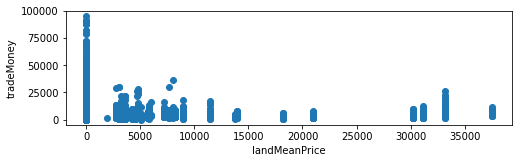

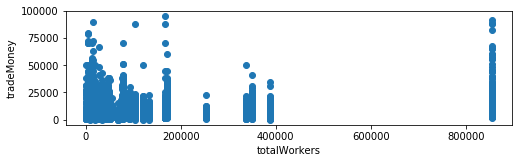

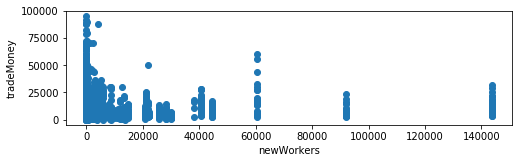

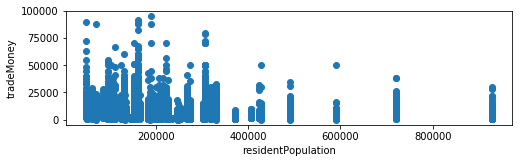

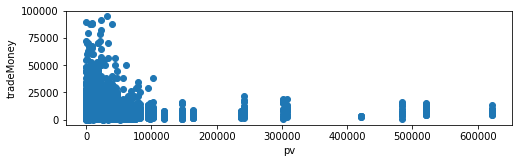

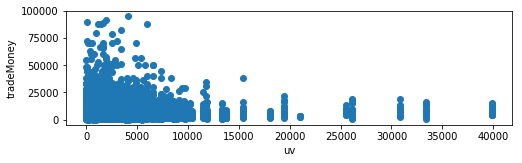

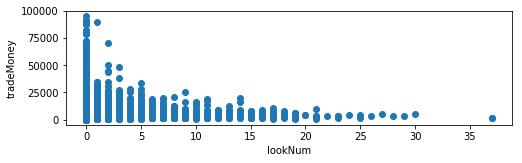

In [13]:
#是否含有单调列
# features = train.columns
i=0
y1 = train['tradeMoney']
#最后一列是各列求和
cols = [c for c in list(f2) if c not in ['tradeMoney','ID']]

for col in cols:  
    df_values = train[col].values
    plt.figure(figsize=(8,100)) 

    
    i+=1
    plt.subplot(len(f2),1,i)
    plt.scatter(df_values, y1)
    plt.xlabel(col)    
    plt.ylabel('tradeMoney')
    plt.show()
#单调列有：saleSecHouseNum、totalNewTradeArea、tradeNewNum、remainNewNum、
# pv、uv、lookNum、bulidYear

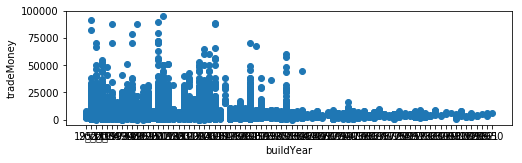

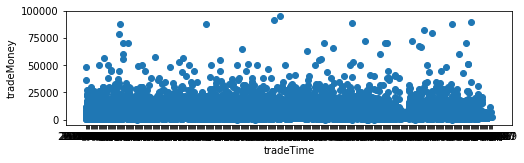

In [14]:
for i,col in enumerate(['buildYear', 'tradeTime']):
    df_values = train[col]
    plt.figure(figsize=(8,100)) 
    i+=1
    plt.subplot(len(f2),1,i)
    plt.scatter(df_values, y1)
    plt.xlabel(col)    
    plt.ylabel('tradeMoney')
    plt.show()

In [38]:
#统计train和test中object特征不同值个数
for i in f1:
    print('{0}-----train：{1};   test:{2}'.format(i,len(train[i].value_counts()),len(test[i].value_counts())))

rentType-----train：4;   test:3
houseType-----train：104;   test:31
houseFloor-----train：3;   test:3
houseToward-----train：10;   test:8
houseDecoration-----train：4;   test:4
communityName-----train：4233;   test:2469
city-----train：1;   test:1
region-----train：15;   test:14
plate-----train：66;   test:63
buildYear-----train：80;   test:67
tradeTime-----train：361;   test:331


In [49]:
train = train[train['area'] < 200]

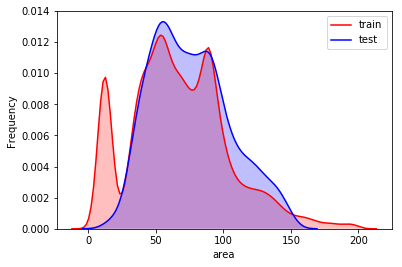

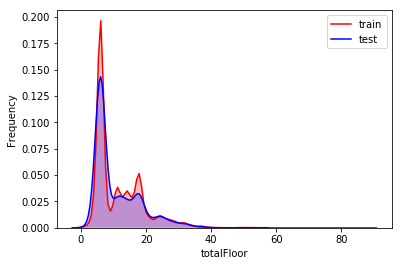

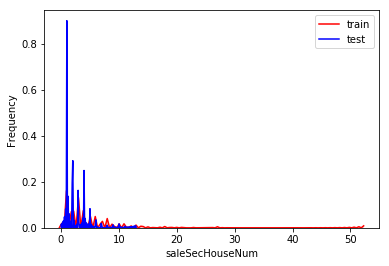

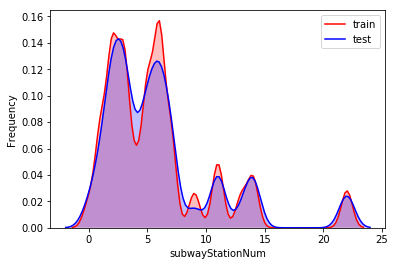

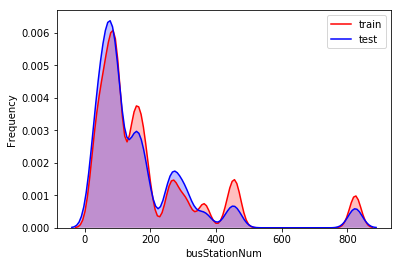

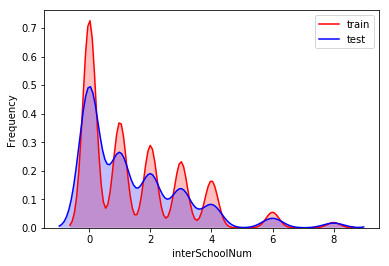

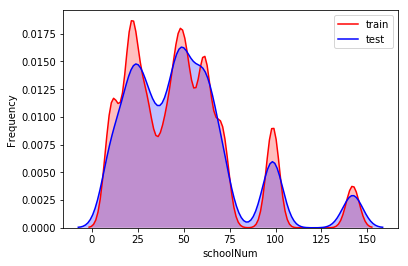

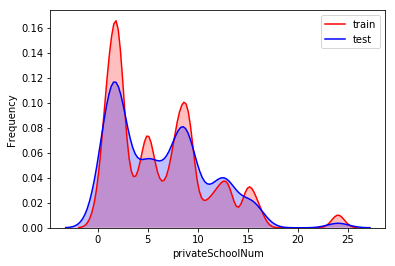

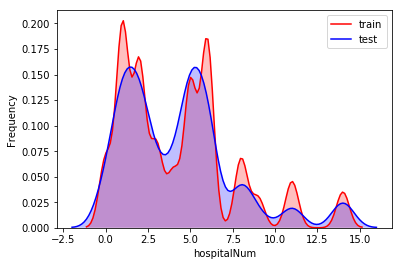

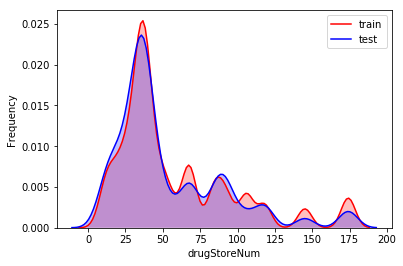

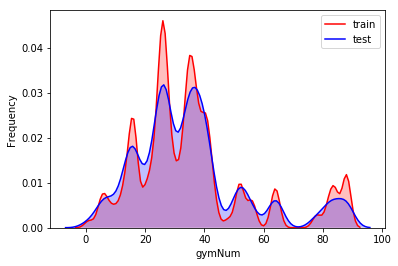

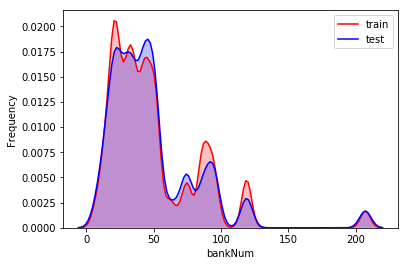

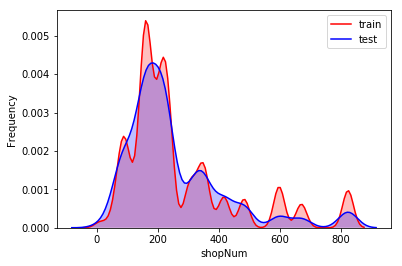

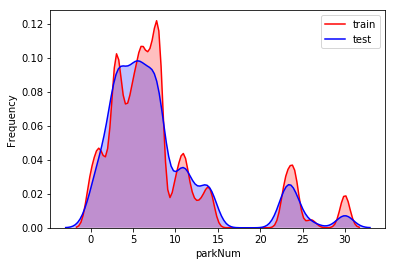

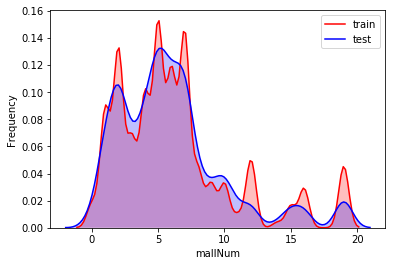

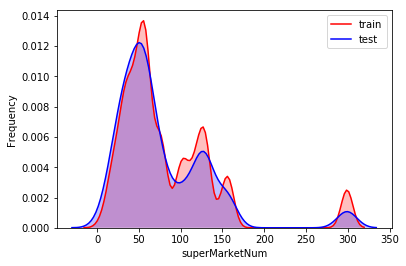

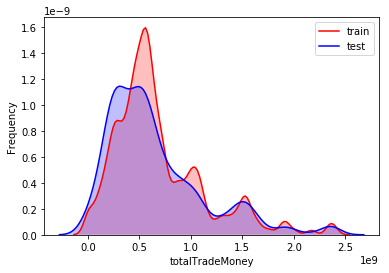

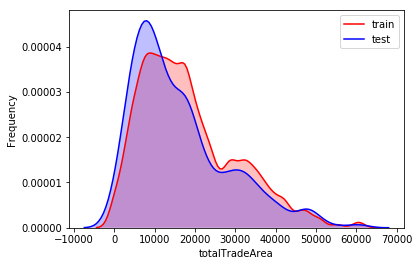

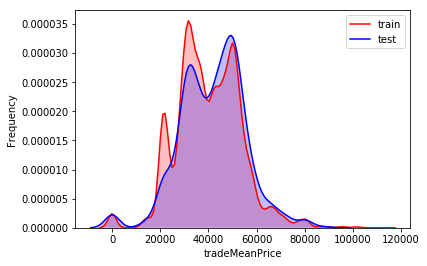

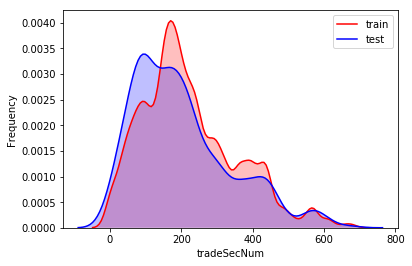

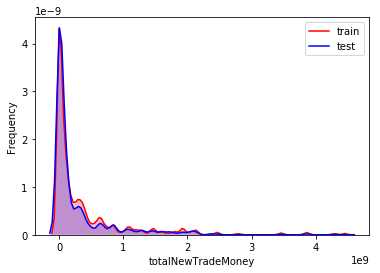

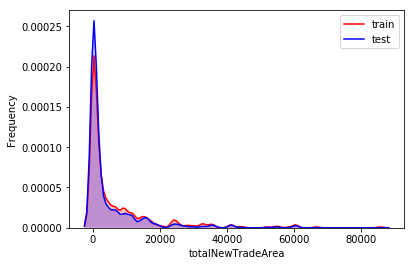

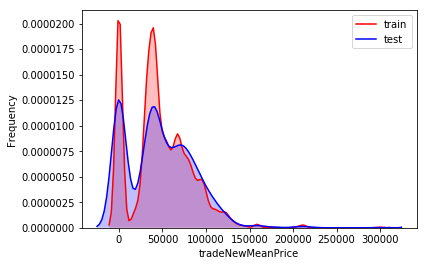

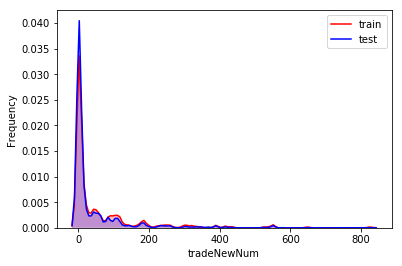

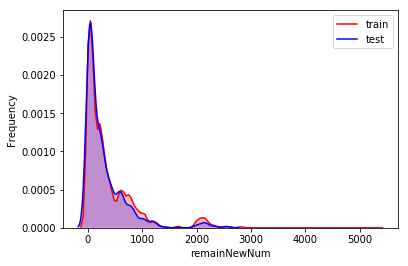

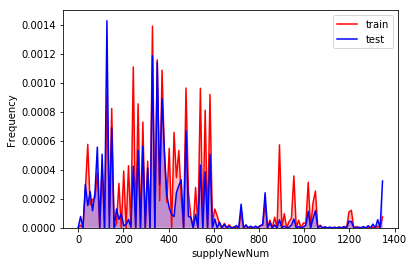

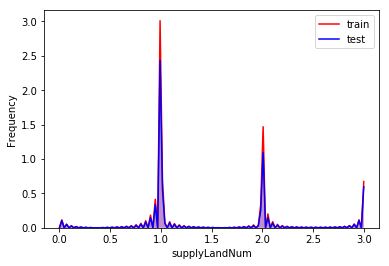

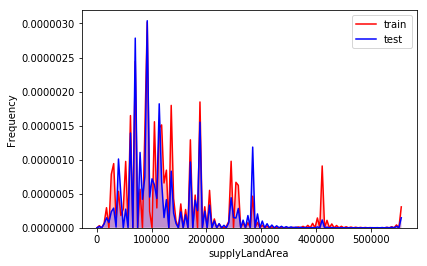

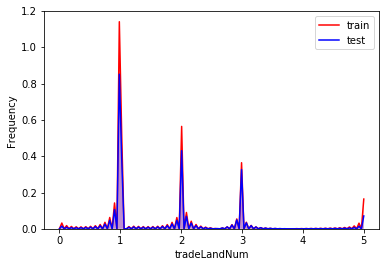

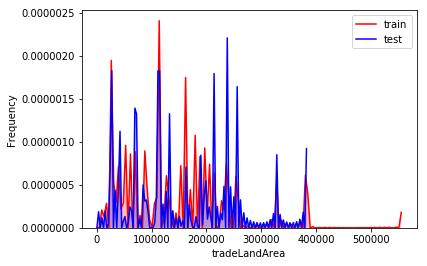

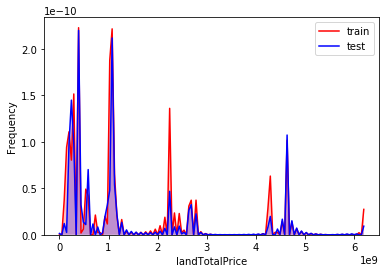

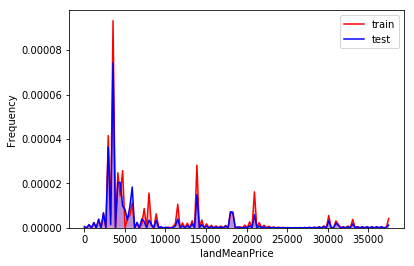

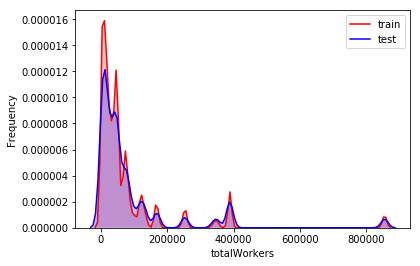

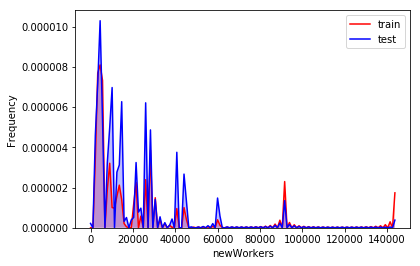

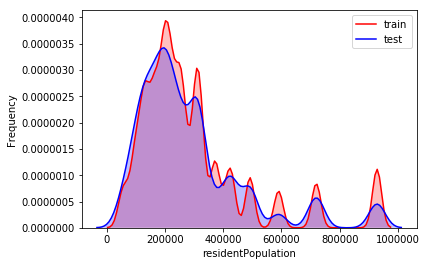

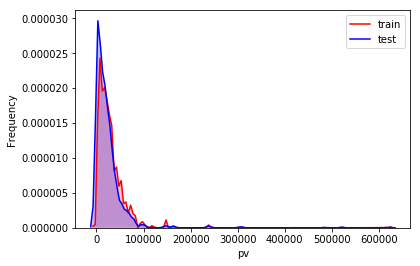

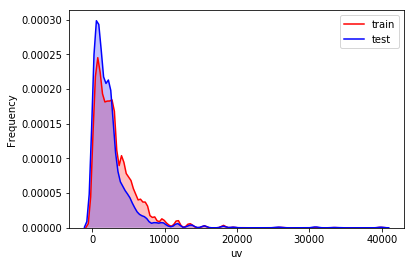

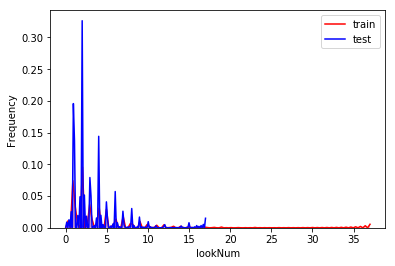

In [50]:
features = [i for i in f2 if i not in ['ID','tradeMoney']]
for column in features:
    g = sns.kdeplot(train[column], color="Red", shade = True)
    g = sns.kdeplot(test[column], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

In [51]:
#baseline
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [55]:
def parseData(df):
    """
    预处理数据
    """
    df['rentType'][df['rentType']=='--'] = '未知方式'
    # 转换object类型数据
    columns = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'communityName', 'region', 'plate']
    for col in columns:
        df[col] = df[col].astype('category')
        
    # 将buildYear列转换为整型数据
    tmp = df['buildYear'].copy()
    tmp2 = tmp[tmp!='暂无信息'].astype('int')
    tmp[tmp=='暂无信息'] = tmp2.mode().iloc[0]
    df['buildYear'] = tmp
    df['buildYear'] = df['buildYear'].astype('int')
    
    # 处理pv和uv的空值
    df['pv'].fillna(df['pv'].mean(),inplace=True)
    df['uv'].fillna(df['uv'].mean(),inplace=True)
    df['pv'] = df['pv'].astype('int')
    df['uv'] = df['uv'].astype('int')
    
    # 去掉部分特征
    df.drop('communityName',axis=1, inplace=True)
    df.drop('city',axis=1,inplace=True)
    
    return df

In [56]:
def washData(df_train, df_test):
    """
    清洗数据
    """
    df_train = df_train[df_train['area']<=200]
    df_train = df_train[df_train['tradeMoney']<=40000]
    
    df_train.drop('ID', axis=1, inplace=True)
    df_test.drop('ID', axis=1,inplace=True)
    
    return df_train, df_test

In [57]:
def feature(df):
    """
    特征
    """
    # 将houseType转化为‘房间数’，‘厅数’，‘卫生间数’
    def parseRoom(info, index):
        res = int(info[index*2])
        return res
    df.insert(3,'室',None)
    df.insert(4, '厅', None)
    df.insert(5, '卫', None)
    df['室'] = df['houseType'].apply(parseRoom, index=0)
    df['厅'] = df['houseType'].apply(parseRoom, index=1)
    df['卫'] = df['houseType'].apply(parseRoom, index=2)
    
    df['交易月份'] = df['tradeTime'].apply(lambda x: int(x.split('/')[1]))
#     df['pv/uv'] = df['pv'] / df['uv']
#     df['房间总数'] = df['室'] + df['厅'] + df['卫']
    
    df.drop('houseType', axis=1, inplace=True)
    df.drop('tradeTime', axis=1, inplace=True)
    
    categorical_feats = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'region', 'plate']
    return df, categorical_feats

In [58]:
def getData(feature):
    """
    获取数据
    """
    train = pd.read_csv('data/train_data.csv')
    test = pd.read_csv('data/test_a.csv')
    
    train = parseData(train)
    test = parseData(test)
    train, test = washData(train, test)
    
    train, col = feature(train)
    test, col = feature(test)
    
    target = train.pop('tradeMoney')
    features = train.columns
    categorical_feats = col
    
    return train, test, target, features, categorical_feats

In [59]:
train, test, target, features, categorical_feats = getData(feature)

In [60]:
features

Index(['area', 'rentType', '室', '厅', '卫', 'houseFloor', 'totalFloor',
       'houseToward', 'houseDecoration', 'region', 'plate', 'buildYear',
       'saleSecHouseNum', 'subwayStationNum', 'busStationNum',
       'interSchoolNum', 'schoolNum', 'privateSchoolNum', 'hospitalNum',
       'drugStoreNum', 'gymNum', 'bankNum', 'shopNum', 'parkNum', 'mallNum',
       'superMarketNum', 'totalTradeMoney', 'totalTradeArea', 'tradeMeanPrice',
       'tradeSecNum', 'totalNewTradeMoney', 'totalNewTradeArea',
       'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum', 'supplyNewNum',
       'supplyLandNum', 'supplyLandArea', 'tradeLandNum', 'tradeLandArea',
       'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers',
       'residentPopulation', 'pv', 'uv', 'lookNum', '交易月份'],
      dtype='object')

In [61]:
categorical_feats

['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'region', 'plate']

In [62]:
params = {
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'min_child_samples':20,
    'objective': 'regression',
    'learning_rate': 0.01,
    "boosting": "gbdt",
    "feature_fraction": 0.8,
    "bagging_freq": 1,
    "bagging_fraction": 0.85,
    "bagging_seed": 23,
    "metric": 'rmse',
    "lambda_l1": 0.2,
    "nthread": 4,
}

In [63]:
folds = KFold(n_splits=5, shuffle=True, random_state=2333)

oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold {}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=target.iloc[trn_idx], categorical_feature=categorical_feats)
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx], categorical_feature=categorical_feats)

    num_round = 10000
    clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 200)
    
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions_lgb += clf.predict(test, num_iteration=clf.best_iteration) / folds.n_splits
    
print("CV Score: {:<8.5f}".format(r2_score(target, oof_lgb)))

fold 0
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 989.369	valid_1's rmse: 1089.82
[1000]	training's rmse: 888.03	valid_1's rmse: 1048.46
[1500]	training's rmse: 825.881	valid_1's rmse: 1029.1
[2000]	training's rmse: 779.545	valid_1's rmse: 1017.2
[2500]	training's rmse: 742.676	valid_1's rmse: 1011.5
[3000]	training's rmse: 711.766	valid_1's rmse: 1006.24
[3500]	training's rmse: 685.342	valid_1's rmse: 1003.17
[4000]	training's rmse: 662.334	valid_1's rmse: 1001.57
[4500]	training's rmse: 641.398	valid_1's rmse: 999.855
Early stopping, best iteration is:
[4546]	training's rmse: 639.534	valid_1's rmse: 999.643
fold 1
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 983.857	valid_1's rmse: 1091.53
[1000]	training's rmse: 879.344	valid_1's rmse: 1048.58
[1500]	training's rmse: 815.5	valid_1's rmse: 1029.79
[2000]	training's rmse: 767.767	valid_1's rmse: 1020.12
[2500]	training's rmse: 730.106	valid_1's rmse: 1

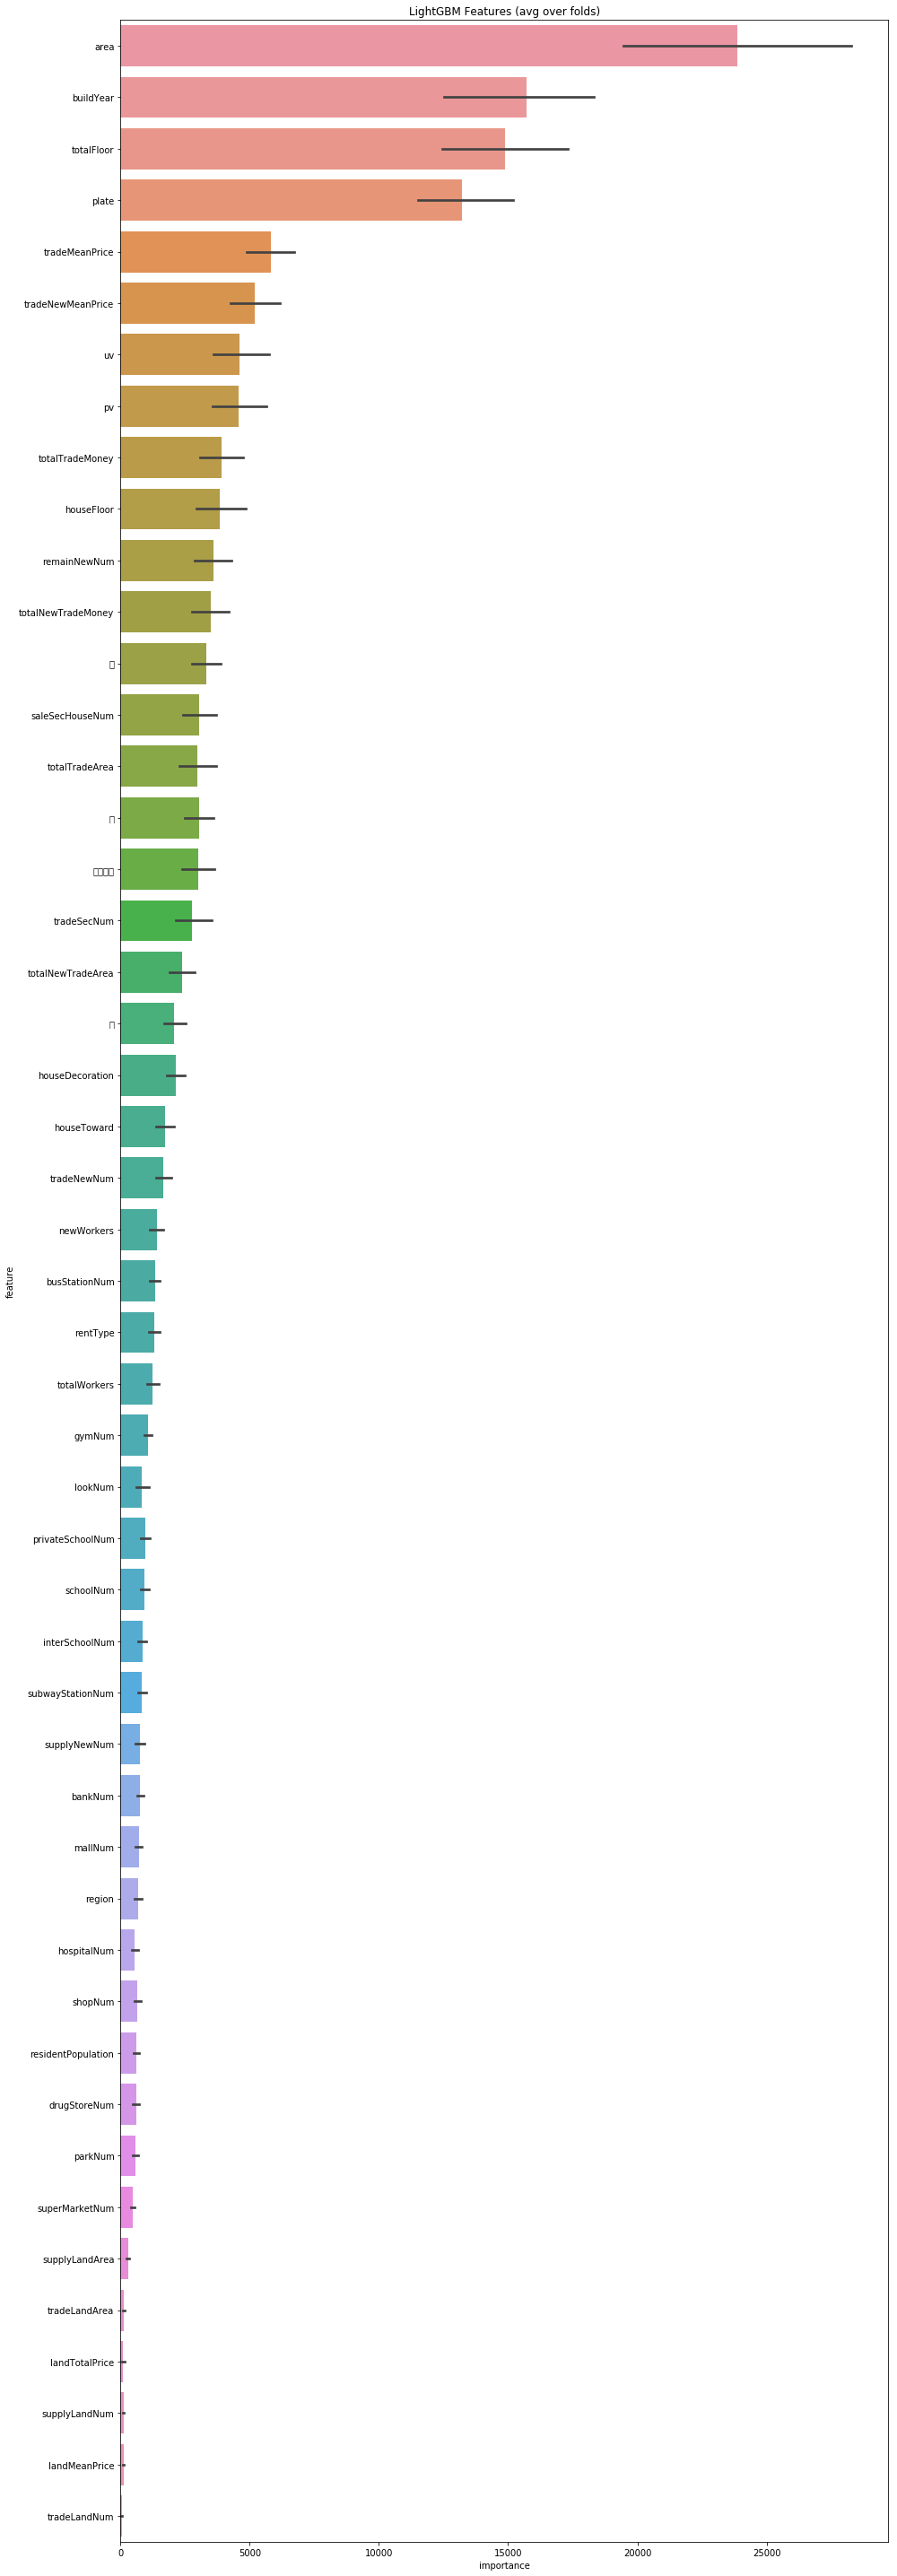

In [64]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,40))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [90]:
from sklearn.metrics import r2_score
def online_score(pred):
    print("预测结果最大值：{},预测结果最小值：{}".format(pred.max(),pred.min()))
    # a榜测分
    conmbine1 = pd.read_csv("./best_result/sub_a_913.csv",engine = "python",header=None)
    score1 = r2_score(pred, conmbine1.values)
    print("对比913分数:{}".format(score1))

In [92]:
online_score(predictions_lgb)

预测结果最大值：17999.851757296634,预测结果最小值：1204.6665511268352
对比913分数:0.9437922303478208


In [93]:
0.9437922303478208*0.913

0.8616823063075604